# Malignant Comments Classifier

# Introduction
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.



# About Dataset

#The data set contains the training set, which has approximately 1,59,571 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:
•	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
•	Highly Malignant: It denotes comments that are highly malignant and hurtful.
•	Rude: It denotes comments that are very rude and offensive.
•	Threat: It contains indication of the comments that are giving any threat to someone.
•	Abuse: It is for comments that are abusive in nature.
•	Loathe: It describes the comments which are hateful and loathing in nature.
•	ID: It includes unique Ids associated with each comment text given.
•	Comment text: This column contains the comments extracted from various social media platforms.


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# DataSet

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


There are 8 features out of which 2 are of object type and 6 are of int type
Non null count shows, no null values are present in dataset.

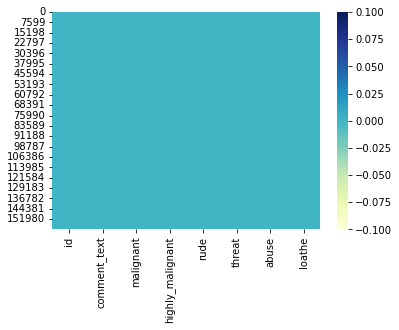

In [5]:
sns.heatmap(df_train.isnull(),cmap="YlGnBu")
plt.show()

We can see that there are no null values present in the dataset.

In [6]:
output_labels = df_train.columns[2:]

#counting non-zero rows i.e Malignant Comments
malignant_comments = len(df_train[df_train[output_labels].any(axis=1)])

#counting rows containing zero i.e., Normal Comments
normal_comments = len(df_train)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df_train),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df_train),2)}%)")



Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


•	Data ratio shows that dataset contains 10.17% of Malignant Comments and 89.83% of Normal Comments. Hence, it is clear that dataset is imbalanced and needs to treated accordingly during train test split of model training.



In [7]:
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()

df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


# Data Cleansing

In [8]:
import nltk
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [9]:
df.drop(columns=['id'],inplace=True)

In [10]:
df['comment_text']=df.comment_text.str.lower()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [12]:
df.comment_text=df.comment_text.str.replace('\n',' ')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [13]:
stop_words = set(stopwords.words('english'))

for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us","ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve","rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

print(stop_words)

{'only', 'a', 'she', 'there', "doesn't", 't', 'o', 'does', 'isn', "haven't", 'll', 'during', 'could', "you've", 'your', 'doing', 'y', 'my', 'just', 'having', 'off', 'as', 'hadn', "wouldn't", 'through', 'ma', "shouldn't", "you'll", 'hers', 'ain', 'hey', 'itself', 'if', 'and', 'mr', 'don', 'which', "didn't", 'mustn', 'p', 'has', 'an', 'l', 'maybe', 'under', "mightn't", 'stfu', 'aren', 'theirs', 'in', 'haven', "he's", 'doesn', "you're", 'needn', 'will', 'oh', 'lmk', 'are', 'any', 'what', 'with', 'up', "it's", 'few', "hadn't", 'ofc', 'the', 'on', 'down', 'each', 'me', 'q', "she's", "hasn't", 'been', 'b', 'e', "she'll", "mustn't", 'omg', 'than', 'us', 'also', 'were', 'couldn', 'further', 'k', 'this', 'or', 'why', 'myself', 'x', 'him', 'heh', "i've", 'of', 'did', 'after', 'these', 'more', 'won', 'smh', 'lmfao', 'himself', 'at', 'lol', 'by', 'to', 'again', 'w', 'be', 's', 've', 'yours', 'nt', 'but', 'u', 'v', 'whom', 'you', 'against', "wasn't", 'wouldn', 'into', 'his', 'hasn', "needn't", 'now

In [14]:
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

In [15]:
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

In [16]:
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
91694,peterthefourth want remove post already removed,0,0,0,0,0,0,67
156990,excellent searching tom thanks whoever transla...,0,0,0,0,0,0,68
87611,image suesbrain jpg lovely image got couple qu...,0,0,0,0,0,0,929
72934,buy one anyone know buy pocketstation besides ...,0,0,0,0,0,0,568
61899,cleanup casual passing noted five instances de...,0,0,0,0,0,0,859
18887,template buckethead purpose templates navigate...,0,0,0,0,0,0,233
3362,league copyeditors participation drive dear le...,0,0,0,0,0,0,483
51040,sure described difference,0,0,0,0,0,0,43
77742,ideally need make choice article explains barr...,0,0,0,0,0,0,177
146747,recent scholarly materials know primarily volo...,0,0,0,0,0,0,585


# Stemming

In [17]:
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

In [18]:
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
41188,strike bad faith surturz surturz made bad fait...,0,0,0,0,0,0,195
149646,wikipedia wikiproject bowl project newli creat...,0,0,0,0,0,0,150
121912,thank award go put main page,0,0,0,0,0,0,58
93513,may utc thank cours tag suppos work snun,0,0,0,0,0,0,95
156244,everybodi think new photo appropri new photo p...,0,0,0,0,0,0,354
11517,sourc materi einsatzgruppp gypten articl borde...,0,0,0,0,0,0,157
152545,speed aircraft fli lower may take time reach s...,0,0,0,0,0,0,867
62769,deal categori realli help add one two articl l...,0,0,0,0,0,0,128
86059,redirect talk murder hannah graham,0,0,0,0,0,0,37
112909,twinkl twinkl faggot user talk buck winston wi...,1,0,1,0,0,0,2295


In [19]:
df["clean_length"]=df.comment_text.str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,clean_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,264,135
1,match background colour seem stuck thank talk ...,0,0,0,0,0,0,112,57
2,man realli tri edit war guy constant remov rel...,0,0,0,0,0,0,233,112
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,622,310
4,sir hero chanc rememb page,0,0,0,0,0,0,67,26


In [20]:
print(f"Total Original Length: {df.original_length.sum()}")
print(f"Total Cleaned Length : {df.clean_length.sum()}")
print(f"% of Length Cleaned  : {(df.original_length.sum()-df.clean_length.sum())*100/df.original_length.sum()}%")

Total Original Length: 62893130
Total Cleaned Length : 34297506
% of Length Cleaned  : 45.46700728680541%


# Exploratory Data Analysis(EDA)

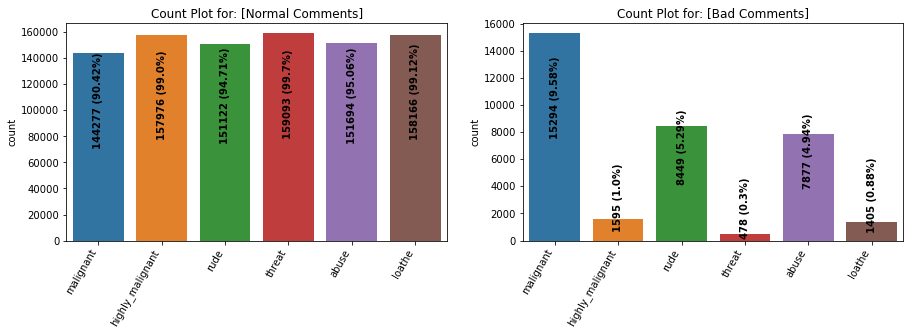

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,4))
for i in range(2):
    sns.countplot(data=df[output_labels][df[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for: [Normal Comments]")
    else:
        ax[i].set_title("Count Plot for: [Bad Comments]")
        
    ax[i].set_xticklabels(output_labels,rotation=60, ha="right")

    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

plt.show()

•	Dataset consists of higher number of Normal Comments than Bad or Malignant Comments. *Therefore, it is clear that dataset is imbalanced and needs to be handle accordingly.
•	Most of the bad comments are of type malignant while least number of type threat is present in dataset.
•	Majority of bad comments are of type malignant, rude and abuse.

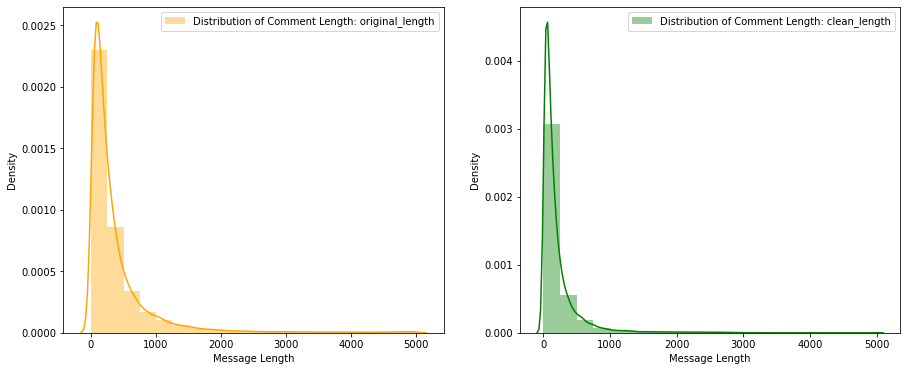

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['orange','green']
for i in df.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Message Length")
    ax[j].legend()
    j += 1    
plt.show()

•	Before cleaning comment text, most of the comment's length lies between 0 to 1100 while after cleaning, it lies between 0 to 900.



# Word Cloud:

In [24]:
!Pip install wordcloud

In [25]:
from wordcloud import WordCloud

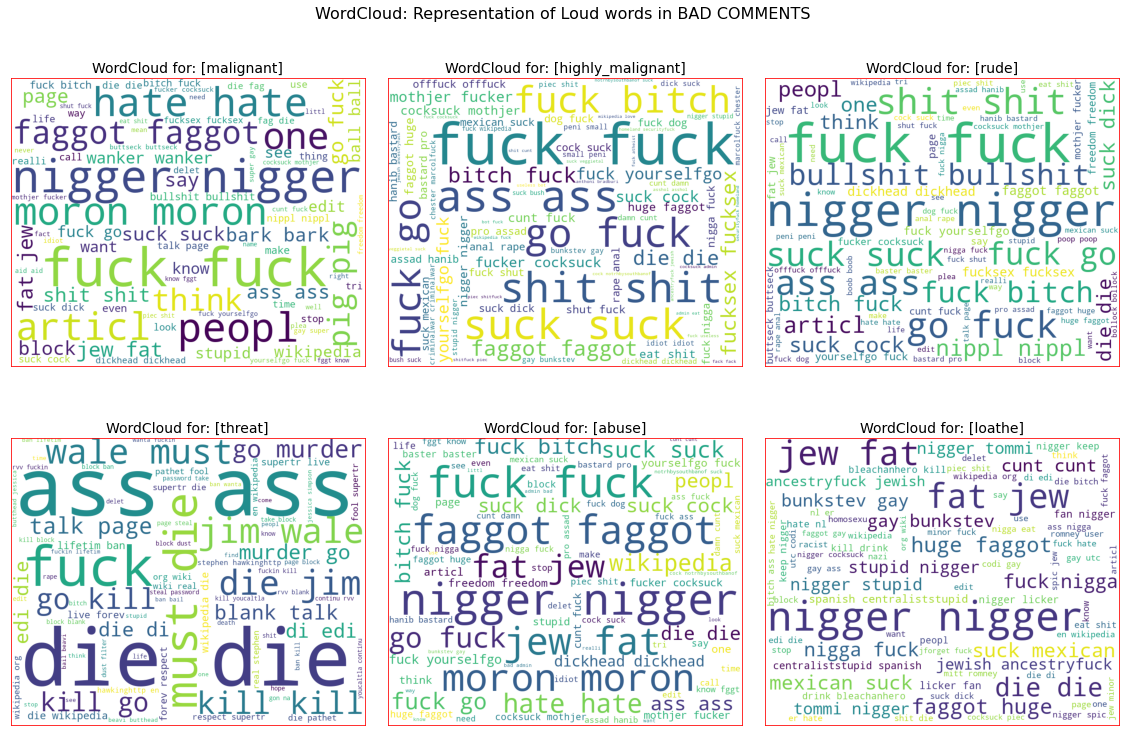

In [26]:
cols = 3
rows = len(output_labels)//cols
if len(output_labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(16,rows*cols*1.8))
fig.subplots_adjust(top=0.8, hspace=0.3)

p=1
for i in output_labels:
    word_cloud = WordCloud(height=650,width=800,background_color="white",max_words=80).generate(' '.join(df.comment_text[df[i]==1]))
    ax = fig.add_subplot(rows,cols,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for: [{i}]",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("WordCloud: Representation of Loud words in BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)
plt.show()

•	From wordcloud of malignant comments, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.
•	From wordcloud of highly_malignant comments, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.
•	From wordcloud of rude comments, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.
•	From wordcloud of threat comments, it is clear that it mostly consists of words like die, must die, kill, murder etc.
•	From wordcloud of abuse comments, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.
•	From wordcloud of loathe comments, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.



# Preparing Data for Model Training & Testing

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.sparse import csr_matrix

In [28]:
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df.comment_text).toarray()
features.shape

(159571, 4000)

# Separating Input and Output Variables

In [29]:
X=features
Y = csr_matrix(df[output_labels]).toarray()
print(X.shape)
print(Y.shape)

(159571, 4000)
(159571, 6)


# Training & Testing Model

In [32]:
!Pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report
import timeit, sys
import tqdm.notebook as tqdm

In [33]:
def build_models(models,x,y,test_size=0.33,random_state=42):
    #spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    #training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n\n\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [34]:
models = {
    "GaussianNB": {
        "name":GaussianNB(),
    },
    "MultinomialNB":{
        "name":MultinomialNB(),
    },    
}


#taking the one forth of the data for training and testig
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/2 [00:00<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.21560957083175086
	Accuracy Score: 0.4729965818458033
              precision    recall  f1-score   support

           0       0.16      0.79      0.26      1281
           1       0.08      0.46      0.13       150
           2       0.11      0.71      0.19       724
           3       0.02      0.25      0.03        44
           4       0.10      0.65      0.17       650
           5       0.04      0.46      0.07       109

   micro avg       0.11      0.70      0.20      2958
   macro avg       0.08      0.55      0.14      2958
weighted avg       0.12      0.70      0.21      2958
 samples avg       0.05      0.07      0.05      2958
Completed in [27.490368200000376 sec.]



Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.024

From the above model comparision it is clear that MultinomialNB performs better with Accuracy Score: 90.74% and Hamming Loss: 2.4% than other models. Therefore, proceeding with MultinoimialNB.

# Model Saving

In [35]:
import joblib
best_model=trained_models['MultinomialNB']['trained']
joblib.dump(best_model,open('malignant_comments_classifier.obj','wb'))

# PreProcessing Pipeline:

The following preprocessing pipeline is required to perform model prediction:
1.	Load dataset
2.	Remove null values
3.	Drop column id
4.	Convert comment text to lower case and replace '\n' with single space.
5.	Keep only text data ie. a-z' and remove other data from comment text.
6.	Remove stop words and punctuations
7.	Apply Stemming using SnowballStemmer
8.	Covert text to vectors using TfidfVectorizer
9.	Load saved or serialized model
10.	Predict values

In [36]:
df_test=pd.read_csv('test.csv')

In [38]:
if df_test.isnull().sum()[1] !=0:
    df_test.dropna(inplace=True)

In [39]:
df_test.drop(columns=['id'],inplace=True)

In [40]:
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

In [41]:
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [42]:
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

In [43]:
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

In [44]:
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

In [45]:
model_loaded = joblib.load('Malignant_Comments_Classifier.obj')
predict_test = model_loaded.predict(test_features)

In [46]:
pd.DataFrame(predict_test.toarray()).to_csv('test_output.csv')

Conclusion: the final accuracy score of 90.74% and hamming loss: 2.4% and this can be further improved by training with more specific data.